In [94]:
import numpy as np
from matplotlib import pyplot as plt

In [174]:
period = 81920
filename = "usrp_samples13"
ch0 = np.fromfile("Log/{}-0.dat".format(filename), np.csingle)#[:period*40]
ch1 = np.fromfile("Log/{}-1.dat".format(filename), np.csingle)#[:period*40]
cut = ch0.shape[0]//period
ch0 = ch0[:cut*period]
ch1 = ch1[:cut*period]
ch0.shape

(4096000,)

([<matplotlib.lines.Line2D at 0x7fbfc4413880>], (4000,))

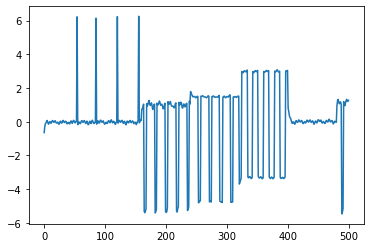

In [175]:
s = 0
e = 500
width = 1024
seqs0 = ch0.reshape((-1, width))
seqs1 = ch1.reshape((-1, width))
tans0 = []
tans1 = []
for seq in seqs0:
    fft_out = np.fft.fftshift(np.fft.fft(seq))[width//2]
    tan = np.angle(fft_out)
    tans0.append(tan)

for seq in seqs1:
    fft_out = np.fft.fftshift(np.fft.fft(seq))[width//2]
    tan = np.angle(fft_out)
    tans1.append(tan)

diff = np.asarray(tans0) - np.asarray(tans1)
plt.plot(diff[s:e]), diff.shape

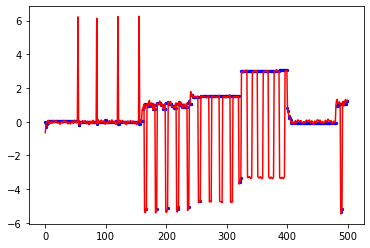

In [176]:
slots = [0,0]
eps = 0.1
fdiff = []
for d in diff:
    if abs(d - slots[0]) > eps and abs(d - slots[1]) > eps:
        slots[0] = slots[1]
        slots[1] = d
    if abs(slots[0]) > abs(slots[1]):
        fdiff.append(slots[1])
    else:
        fdiff.append(slots[0])

plt.plot(np.arange(s, e), diff[s:e], c='r')
plt.scatter(np.arange(s, e), fdiff[s:e], s=5, c='b')
# plt.scatter(np.arange(s, e), diff[s:e], s=2)
plt.savefig("Log/{}.png".format(filename))

In [173]:
ph0 = fdiff[120]
ph1 = fdiff[200]
ph2 = fdiff[280]
ph3 = fdiff[360]
ph0, ph1, ph2, ph3
# antenna orders
# {1, 1, 0, 0},
# {1, 0, 1, 0}

(1.1041608462008468,
 -2.3020909088108095,
 0.11016650462860378,
 2.528816226047837)

In [162]:
f = 1.68e9
c = 3e8
lam = c/f*100
print(lam)
# antenna orders
# {1, 1, 0, 0},
# {1, 0, 1, 0}

17.857142857142858
